In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('financials.csv')

In [201]:
# Vérifier les valeurs manquantes initiales
print("Valeurs manquantes avant traitement :")
print(data.isnull().sum())


Valeurs manquantes avant traitement :
Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


In [202]:
# Remplir les valeurs manquantes uniquement pour les colonnes numériques
data = data.apply(
    lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col
)


In [203]:
# Vérification après remplissage
print("\nValeurs manquantes après traitement :")
print(data.isnull().sum())



Valeurs manquantes après traitement :
Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


In [204]:
# Nettoyer les données (supprimer les colonnes non nécessaires)
columns_to_drop = [
    'Symbol', 'Name', 'SEC Filings',  # Colonnes textuelles ou inutiles
]
data = data.drop(columns=columns_to_drop, errors='ignore')

In [205]:
# Encoder les colonnes catégorielles
label_encoder = LabelEncoder()
for col in ['Sector']:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

In [206]:
# Créer une colonne cible binaire pour le risque (1 = Risque, 0 = Non Risque)
threshold = 100  # Exemple de seuil pour Price
data['Risk'] = (data['Price'] > threshold).astype(int)

In [207]:
# Variables d'entrée (X) et cible (y)
X = data[['Price', 'Price/Earnings', 'Dividend Yield']]  # Colonnes sélectionnées
y = data['Risk']  # Cible binaire : Risque (1) ou Non Risque (0)

In [208]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [210]:
# Entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)  # k=3
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [211]:
# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

In [212]:
# Ajouter les prédictions dans un DataFrame pour l'analyse
results = pd.DataFrame({
    'Price': X_test[:, 0],  # Première colonne (Price après normalisation)
    'Price/Earnings': X_test[:, 1],  # Deuxième colonne
    'Dividend Yield': X_test[:, 2],  # Troisième colonne
    'Predicted Risk': y_pred
})

In [213]:
# Visualiser le diagramme de dispersion
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

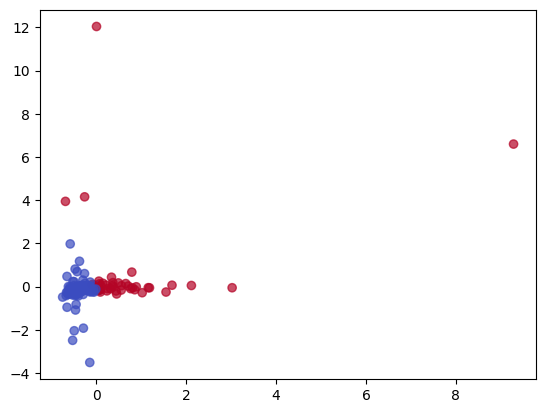

In [214]:
# Diagramme de dispersion basé sur les prédictions
plt.scatter(
    results['Price'], results['Price/Earnings'],
    c=results['Predicted Risk'], cmap='coolwarm', label='Risque', alpha=0.7
)

In [215]:
from sklearn.metrics import accuracy_score
# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9342105263157895